In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.dates as mdates
from datetime import datetime
import matplotlib.pyplot as plt
import glob as gb
import os
import matplotlib.dates as mdates
from cycler import cycler
from collections import OrderedDict

%matplotlib notebook

In [4]:
# Load HDF file
folder = 'T2_reflectance_standard_currentsweep'
data_folder = 'Z:/LabOnChip/Data/'  # '../Data/'
df = pd.HDFStore(data_folder + str(folder) +'/analysis.h5')['df']

# Create column for time since start of measurement
df['delta'] = (df['datetime']-df['datetime'][0]).fillna(0).astype('timedelta64[us]')/(1E6*60)

In [7]:
df.head()
# df.info()

,datetime,chip,concentration,current,fs,humidity,measurementID,medium,optical power,sample_no,sweep_no,sweeps,tempC,A,tau,c,delta
0,2016-08-08 16:26:23.305363,T2,99,0.5,0.0001,37.47,T2_reflectance_standard,Reflectance Standards,0.251427,1000,1,200,24.39,1.964531,12.040742,0.000518,0.000000
1,2016-08-08 16:26:24.551487,T2,99,0.5,0.0001,37.47,T2_reflectance_standard,Reflectance Standards,0.251427,1000,2,200,24.39,1.985872,11.949072,0.000976,0.020769
2,2016-08-08 16:26:24.827515,T2,99,0.5,0.0001,37.47,T2_reflectance_standard,Reflectance Standards,0.251427,1000,3,200,24.39,1.986816,11.938405,0.001186,0.025369
3,2016-08-08 16:26:25.076540,T2,99,0.5,0.0001,37.47,T2_reflectance_standard,Reflectance Standards,0.251427,1000,4,200,24.39,1.979316,11.980022,0.000320,0.029520
4,2016-08-08 16:26:25.426575,T2,99,0.5,0.0001,37.47,T2_reflectance_standard,Reflectance Standards,0.251427,1000,5,200,24.39,1.964247,12.045032,-0.000102,0.035354


# Real time raw data

In [22]:
grouped = df.groupby(['concentration'])

<IPython.core.display.Javascript object>


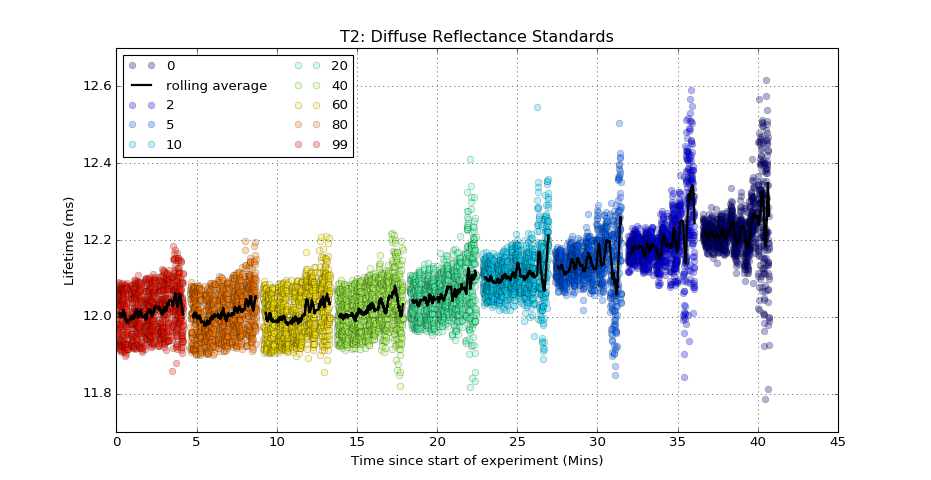

In [9]:
# Create colormap for plotting
n = len(df.concentration.unique()) # Number of colors
new_colors = [plt.get_cmap('jet')(1. * i/n) for i in range(n)]
plt.rc('axes', prop_cycle=(cycler('color', new_colors)))

# All in one
fig, ax = plt.subplots()

for key, group in grouped:
    ax.plot(group['delta'], group['tau'], 'o', alpha=0.3, label=key)
    rolling = group['tau'].rolling(window=50).mean()
#     ax.plot(group['delta'], rolling, '-', lw=2, label='rolling ({k})'.format(k=key), color='black')
    ax.plot(group['delta'], rolling, '-', lw=2, label='rolling average', color='black')

ax.xaxis.grid(True, which="major")
ax.yaxis.grid()
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='best', ncol=2, fontsize='medium')
plt.xlabel('Time since start of experiment (Mins)')
plt.ylabel('Lifetime (ms)')
plt.title('{}: Diffuse Reflectance Standards'.format(df.chip.unique()[0]))
plt.savefig(data_folder +  str(folder) + '/lifetimeVsTime.png', dpi=500)

# Each concentration vs lifetime (Rolling Mean)

In [10]:
plt.close("all")

In [11]:
# Make directory to store files
directory = data_folder + str(folder) + '/individual/'
if not os.path.exists(directory):
    os.makedirs(directory)

<IPython.core.display.Javascript object>


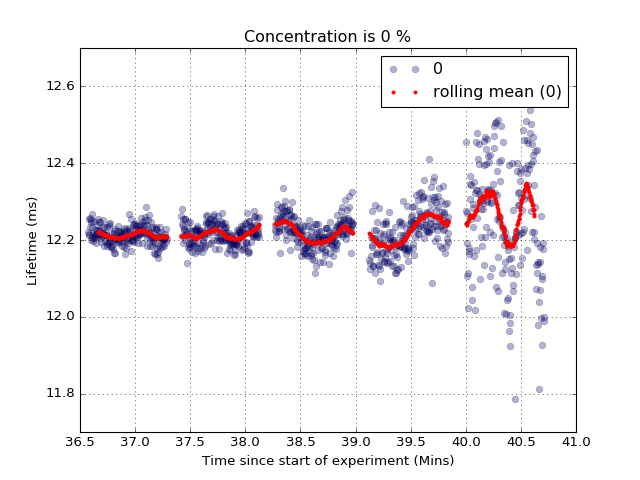

<IPython.core.display.Javascript object>


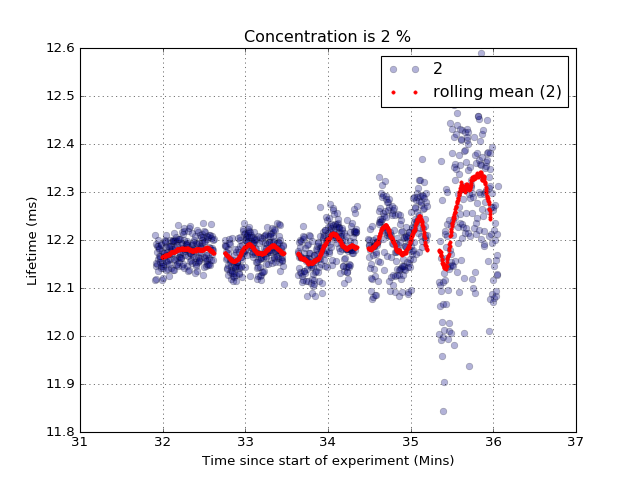

<IPython.core.display.Javascript object>


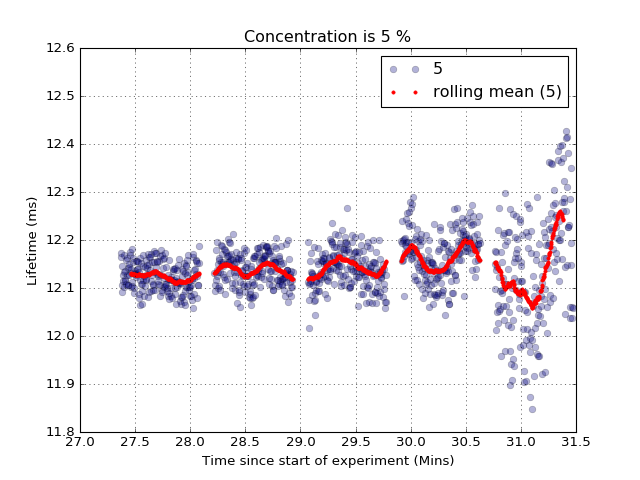

<IPython.core.display.Javascript object>


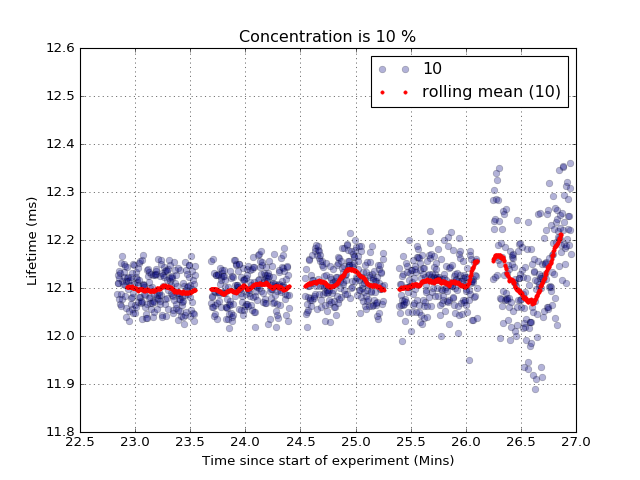

<IPython.core.display.Javascript object>


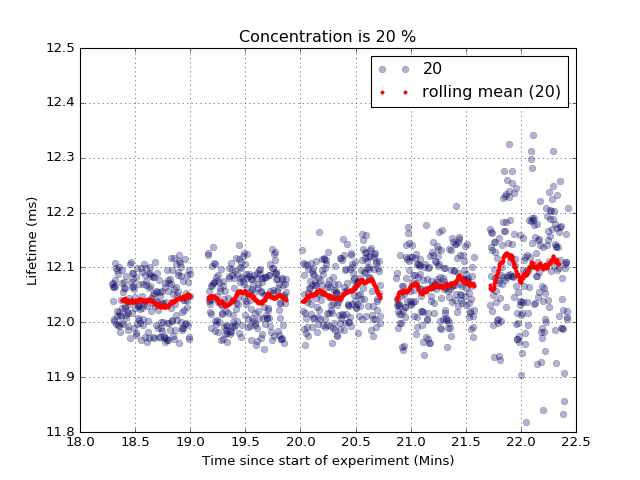

<IPython.core.display.Javascript object>


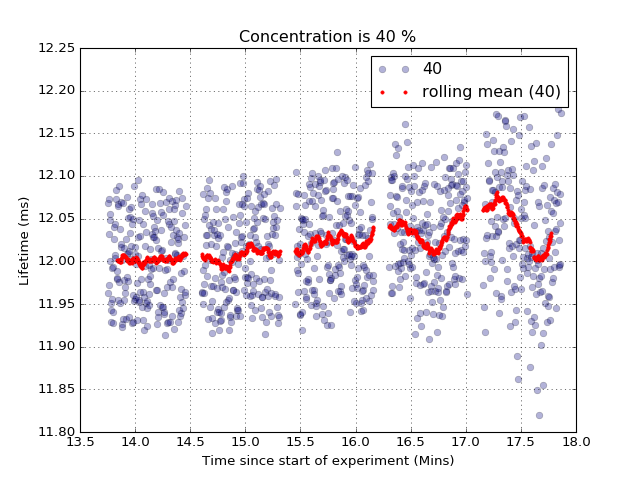

<IPython.core.display.Javascript object>


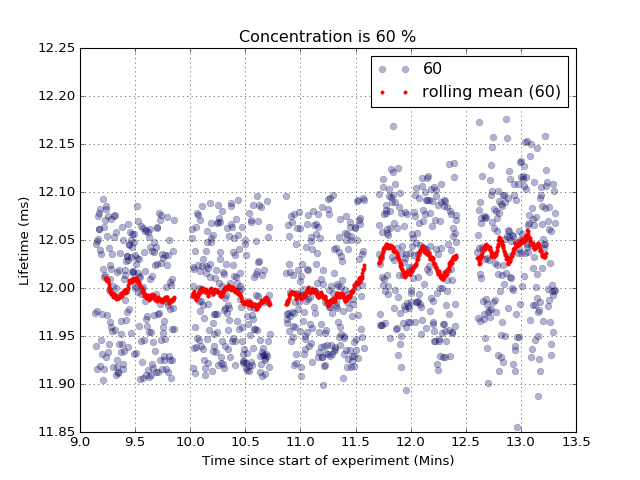

<IPython.core.display.Javascript object>


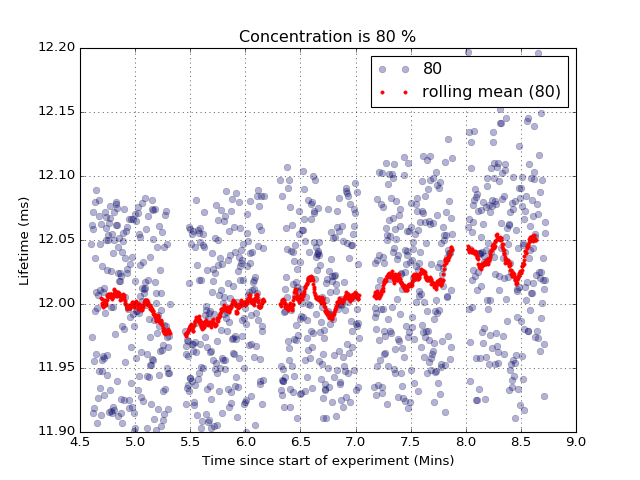

<IPython.core.display.Javascript object>


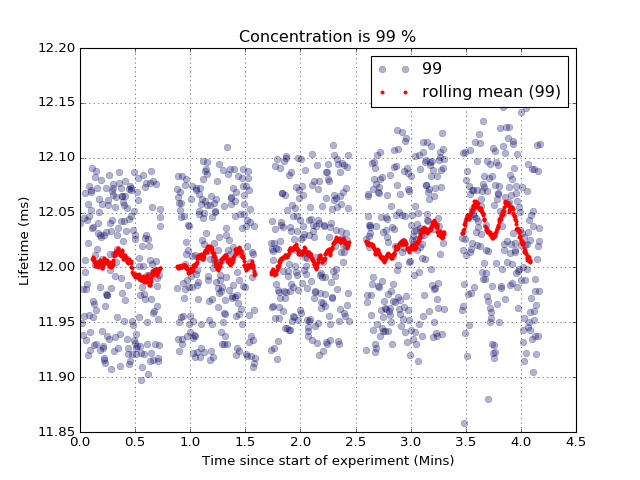

In [12]:
# Individual plots
for key, group in grouped:
    plt.figure()
    plt.ticklabel_format(useOffset=False, axis='y')
    plt.plot(group['delta'], group['tau'], 'o', alpha=0.3, label=key)
    rolling = group['tau'].rolling(window=50, center=True).mean()
    plt.plot(group['delta'], rolling, '.', lw=3, color='red', label='rolling mean ({k})'.format(k=key)) 
    plt.title('Diffuse reflectance is {} %'.format(key))
    plt.grid()
    plt.xlabel('Time since start of experiment (Mins)')
    plt.ylabel('Lifetime (ms)')
    plt.legend()
    plt.savefig(data_folder + str(folder) + '/individual/' + str(key) + '.png', dpi=200)

In [28]:
plt.close("all")

In [30]:
grouped = df.groupby(['current', 'concentration'])

## tau & A vs concentration

In [31]:
# Apply mean and std functions to all collumns
g = grouped.agg([np.mean, np.std])

In [43]:
g.head()

fs       humidity           optical power  \
                         mean  std      mean       std          mean   
current concentration                                                  
0.1     0              0.0001  0.0  36.20450  0.041234      0.035480   
        2              0.0001  0.0  36.49090  0.058449      0.035464   
        5              0.0001  0.0  36.61415  0.048061      0.035481   
        10             0.0001  0.0  36.41475  0.047107      0.035514   
        20             0.0001  0.0  36.78205  0.044432      0.035563   

                                sample_no      sweep_no               ...     \
                            std      mean  std     mean        std    ...      
current concentration                                                 ...      
0.1     0              0.000175      1000  0.0    100.5  57.879185    ...      
        2              0.000167      1000  0.0    100.5  57.879185    ...      
        5              0.000162      1000  0.0    100.5  57.879185    ...      
        10             0.000177      1000  0.0    100.5  57.879185    ...      
        20             0.000126      1000  0.0    100.5  57.879185    ...      

                          tempC                   A                  tau  \
                           mean       std      mean       std       mean   
current concentration                                                      
0.1     0              24.57470  0.014455  0.055951  0.000513  12.262056   
        2              24.56975  0.014334  0.057413  0.000523  12.259305   
        5              24.54305  0.015984  0.066961  0.000513  12.139442   
        10             24.49140  0.013489  0.076553  0.000597  12.143453   
        20             24.48520  0.019204  0.096341  0.000751  12.098777   

                                        c                delta            
                            std      mean       std       mean       std  
current concentration                                                     
0.1     0              0.152713 -0.004052  0.000125  40.354718  0.206113  
        2              0.144411 -0.004090  0.000193  35.697856  0.206086  
        5              0.124515 -0.004063  0.000228  31.114694  0.206155  
        10             0.101912 -0.003959  0.000180  26.597847  0.206224  
        20             0.100997 -0.003914  0.000129  22.071207  0.206248  

[5 rows x 22 columns]

In [44]:
g = g.reset_index()

In [49]:
g.head()

current concentration      fs       humidity           optical power  \
                           mean  std      mean       std          mean   
0     0.1             0  0.0001  0.0  36.20450  0.041234      0.035480   
1     0.1             2  0.0001  0.0  36.49090  0.058449      0.035464   
2     0.1             5  0.0001  0.0  36.61415  0.048061      0.035481   
3     0.1            10  0.0001  0.0  36.41475  0.047107      0.035514   
4     0.1            20  0.0001  0.0  36.78205  0.044432      0.035563   

            sample_no         ...        tempC                   A            \
        std      mean  std    ...         mean       std      mean       std   
0  0.000175      1000  0.0    ...     24.57470  0.014455  0.055951  0.000513   
1  0.000167      1000  0.0    ...     24.56975  0.014334  0.057413  0.000523   
2  0.000162      1000  0.0    ...     24.54305  0.015984  0.066961  0.000513   
3  0.000177      1000  0.0    ...     24.49140  0.013489  0.076553  0.000597   
4  0.000126      1000  0.0    ...     24.48520  0.019204  0.096341  0.000751   

         tau                   c                delta            
        mean       std      mean       std       mean       std  
0  12.262056  0.152713 -0.004052  0.000125  40.354718  0.206113  
1  12.259305  0.144411 -0.004090  0.000193  35.697856  0.206086  
2  12.139442  0.124515 -0.004063  0.000228  31.114694  0.206155  
3  12.143453  0.101912 -0.003959  0.000180  26.597847  0.206224  
4  12.098777  0.100997 -0.003914  0.000129  22.071207  0.206248  

[5 rows x 24 columns]

In [54]:
g2 = g[['current', 'concentration', 'tau', 'A']]
g2.head()

current concentration        tau                   A          
                              mean       std      mean       std
0     0.1             0  12.262056  0.152713  0.055951  0.000513
1     0.1             2  12.259305  0.144411  0.057413  0.000523
2     0.1             5  12.139442  0.124515  0.066961  0.000513
3     0.1            10  12.143453  0.101912  0.076553  0.000597
4     0.1            20  12.098777  0.100997  0.096341  0.000751

In [56]:
g3 = g2.groupby('current')

<IPython.core.display.Javascript object>


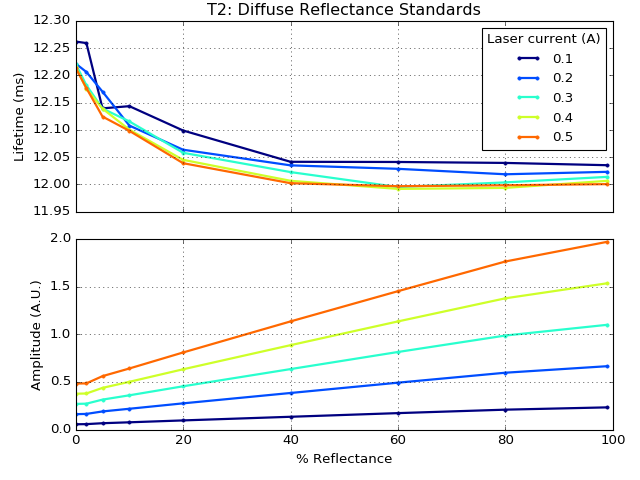

In [138]:
# Create colormap for plotting
n = len(df.current.unique()) # Number of colors
new_colors = [plt.get_cmap('jet')(1. * i/n) for i in range(n)]
plt.rc('axes', prop_cycle=(cycler('color', new_colors)))

# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

for key, g in g3:
    ax1.plot(g['concentration'], g['tau']['mean'], '.-', lw='2', label=key)
    ax2.plot(g['concentration'], g['A']['mean'], '.-', lw='2', label=key)

ax2.set_xlabel('% Reflectance')
ax1.set_ylabel('Lifetime (ms)')
ax2.set_ylabel('Amplitude (A.U.)')

ax1.grid()
ax2.grid()
plt.tight_layout()
ax1.ticklabel_format(useOffset=False, axis='y')
ax2.ticklabel_format(useOffset=False, axis='y')
ax1.set_title('{}: Diffuse Reflectance Standards'.format(df.chip.unique()[0]))
ax1.legend(title='Laser current (A)', loc='best', fontsize='medium')
# plt.savefig(data_folder +  str(folder) + '/final.png', dpi=500)

In [171]:
# Drop air as the refractive index is different
g2 = g2.loc[g2['concentration'] != 0]

In [172]:
g2.head()

current concentration        tau                   A          
                              mean       std      mean       std
1     0.1             2  12.259305  0.144411  0.057413  0.000523
2     0.1             5  12.139442  0.124515  0.066961  0.000513
3     0.1            10  12.143453  0.101912  0.076553  0.000597
4     0.1            20  12.098777  0.100997  0.096341  0.000751
5     0.1            40  12.041326  0.078788  0.134547  0.000905

In [173]:
import matplotlib.mlab as ml

In [174]:
x = g2.concentration
y = g2.current
z = g2['tau']['mean']

<IPython.core.display.Javascript object>


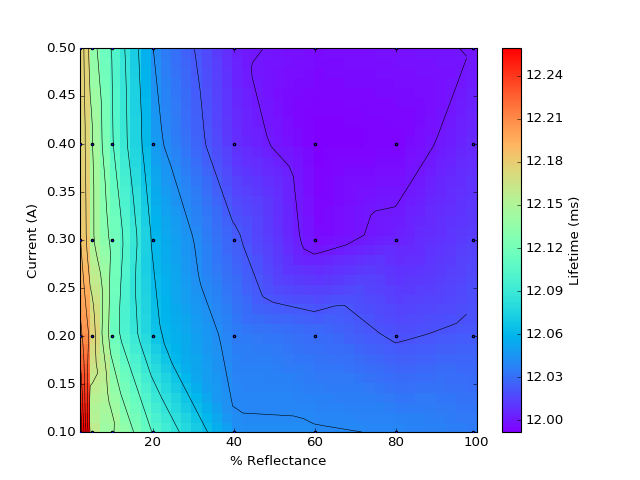

In [178]:
fig, ax = plt.subplots()
xi = np.linspace(min(x), 100, len(x))
yi = np.linspace(min(y), max(y), len(y))
zi = ml.griddata(x, y, z, xi, yi, interp='linear')

plt.contour(xi, yi, zi, 15, linewidths=0.5, colors='k')
plt.pcolormesh(xi, yi, zi, cmap=plt.get_cmap('rainbow'))
plt.colorbar(label='Lifetime (ms)')
plt.scatter(x, y, marker='o', c='b', s=5, zorder=10)
plt.xlim(min(x), 100)
plt.ylim(min(y), max(y))
ax.set_xlabel('% Reflectance')
ax.set_ylabel('Current (A)')

<IPython.core.display.Javascript object>


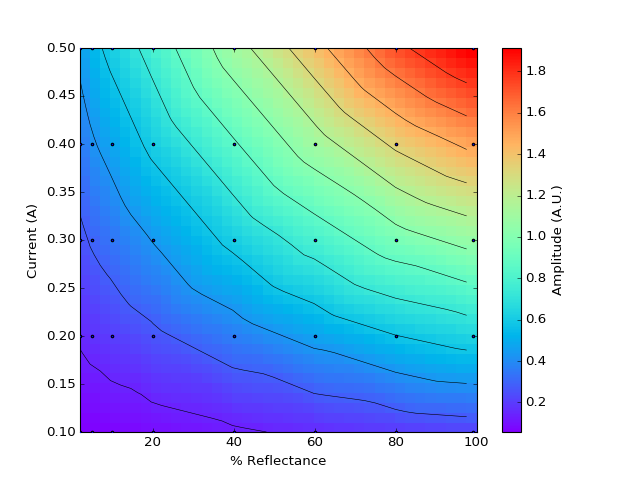

In [179]:
z = g2['A']['mean']
fig, ax = plt.subplots()
xi = np.linspace(min(x), 100, len(x))
yi = np.linspace(min(y), max(y), len(y))
zi = ml.griddata(x, y, z, xi, yi, interp='linear')

plt.contour(xi, yi, zi, 15, linewidths=0.5, colors='k')
plt.pcolormesh(xi, yi, zi, cmap=plt.get_cmap('rainbow'))
plt.colorbar(label='Amplitude (A.U.)')
plt.scatter(x, y, marker='o', c='b', s=5, zorder=10)
plt.xlim(min(x), 100)
plt.ylim(min(y), max(y))
ax.set_xlabel('% Reflectance')
ax.set_ylabel('Current (A)')